<a href="https://colab.research.google.com/github/marcinmichalsmolen/adam/blob/main/TFDS_FLOWERS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Training model with Adagrad optimizer...
Epoch 1/20
92/92 [==============================] - 18s 68ms/step - loss: 1.5530 - accuracy: 0.3038 - val_loss: 1.5072 - val_accuracy: 0.3134
Epoch 2/20
92/92 [==============================] - 5s 51ms/step - loss: 1.4322 - accuracy: 0.4019 - val_loss: 1.3894 - val_accuracy: 0.3951
Epoch 3/20
92/92 [==============================] - 6s 65ms/step - loss: 1.3286 - accuracy: 0.4489 - val_loss: 1.2940 - val_accuracy: 0.4578
Epoch 4/20
92/92 [==============================] - 5s 53ms/step - loss: 1.2506 - accuracy: 0.4785 - val_loss: 1.2319 - val_accuracy: 0.5068
Epoch 5/20
92/92 [==============================] - 5s 58ms/step - loss: 1.1998 - accuracy: 0.5024 - val_loss: 1.1920 - val_accuracy: 0.5123
Epoch 6/20
92/92 [==============================] - 5s 51ms/step - loss: 1.1627 - accuracy: 0.5160 - val_loss: 1.1656 - val_

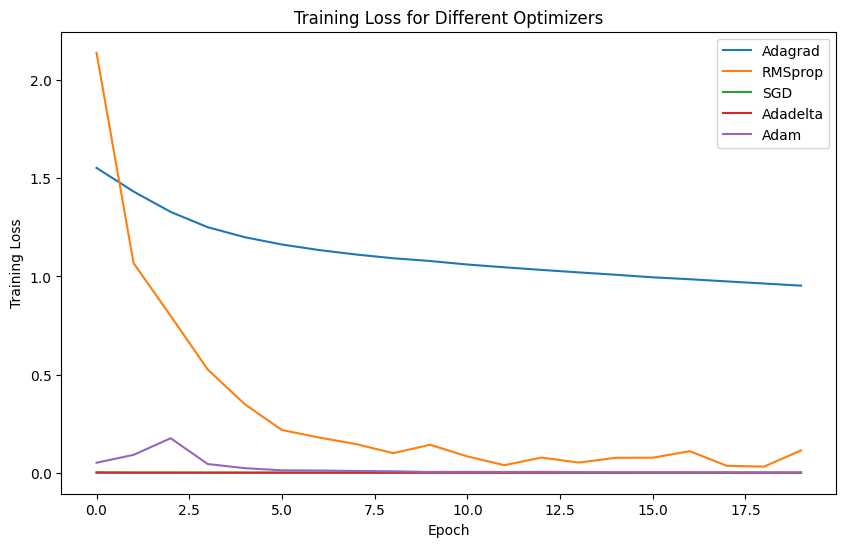

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adagrad, RMSprop, SGD, Adadelta, Adam
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load TFDS dataset
dataset_name = 'tf_flowers'
(train_dataset, validation_dataset, test_dataset), dataset_info = tfds.load(
    name=dataset_name,
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    shuffle_files=True,
    with_info=True,
    as_supervised=True
)

# Preprocess data
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150)) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess)
validation_dataset = validation_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)

# Define model
model_tfds = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

# Define training settings
batch_size = 32
epochs = 20
optimizer_names = ['Adagrad', 'RMSprop', 'SGD', 'Adadelta', 'Adam']
optimizers = [Adagrad(), RMSprop(), SGD(), Adadelta(), Adam()]

# Train models with different optimizers
history = {}
for optimizer_name, optimizer in zip(optimizer_names, optimizers):
    print(f'Training model with {optimizer_name} optimizer...')
    model_tfds.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history[optimizer_name] = model_tfds.fit(train_dataset.batch(batch_size), epochs=epochs,
                                             validation_data=validation_dataset.batch(batch_size))

# Plot training loss for all models on one graph
plt.figure(figsize=(10, 6))
for optimizer_name in optimizer_names:
    plt.plot(history[optimizer_name].history['loss'], label=optimizer_name)
plt.title('Training Loss for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()
